# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
TRAIN = False
EXPLORE = True

def do_it():
    # set the replay buffer size to that it fills after ~5000 bad episodes
    # (at ~14 experiences/episode), based on the bad step retention rate
    buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))

    set_id += 1
    RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
    print("\n///// Beginning training set ", RUN_NAME, " with:")
    print("      LR actor         = ", LR_ACTOR)
    print("      LR critic        = ", LR_CRITIC)
    print("      Learning every     ", LEARN_EVERY, " time steps")
    print("      Learn iterations = ", LEARN_ITER)
    print("      Tau              = ", TAU)
    print("      Seed             = ", SEED)

    ##### instantiate the agents and perform the training

    maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                    random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                    noise_decay=NOISE_DECAY, learn_every=LEARN_EVERY, 
                    learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                    weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                    tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

    scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                   winning_score=0.5, max_time_steps=TIME_STEPS,
                   checkpoint_interval=5000)

    ##### plot the training reward history

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

    ##### store the action/noise data, if being used

    if SAVE_ANALYSIS:
        maddpg.save_anal_data(RUN_PREFIX)



Ready to train E24 over 16 training sets for 30001 episodes each, with fixed params:
    Max episodes  =  30001
    Batch size    =  1000
    Bad step prob =  0.01
    Noise decay   =  1.0
    Noise scale   =  0.001
    Weight decay  =  1e-05
    Gamma         =  0.99
    Tau           =  0.001

///// Beginning training set  E24.01  with:
      LR actor         =  0.0005
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  111
5000	Average score:   0.000,        mem:   1706/    71 ( 4.2%), avg 1561.6 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2431/    71 ( 2.9%), avg 1536.8 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3154/    71 ( 2.3%), avg 1563.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3874/    71 ( 1.8%), avg 1577.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4587/    71 ( 1.5%), avg 1581.7 eps/min;  0.1 hr r

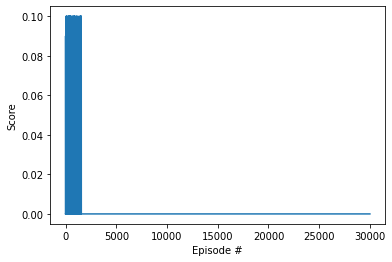


///// Beginning training set  E24.02  with:
      LR actor         =  0.0005
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  23100
5000	Average score:   0.000,        mem:   1955/   222 (11.4%), avg 1144.2 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2669/   222 ( 8.3%), avg 1203.5 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3374/   222 ( 6.6%), avg 1233.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4046/   222 ( 5.5%), avg 1252.8 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4717/   222 ( 4.7%), avg 1259.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5420/   222 ( 4.1%), avg 1268.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.6/58


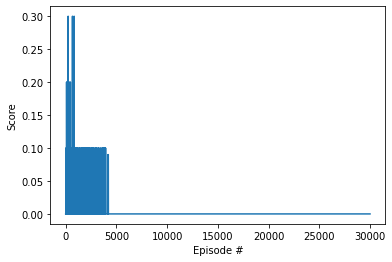


///// Beginning training set  E24.03  with:
      LR actor         =  0.0005
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  111
5000	Average score:   0.000,        mem:   1631/    49 ( 3.0%), avg 1279.3 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2343/    49 ( 2.1%), avg 1276.1 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3046/    49 ( 1.6%), avg 1250.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3748/    49 ( 1.3%), avg 1253.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4450/    49 ( 1.1%), avg 1269.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5157/    49 ( 1.0%), avg 1292.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.3/47


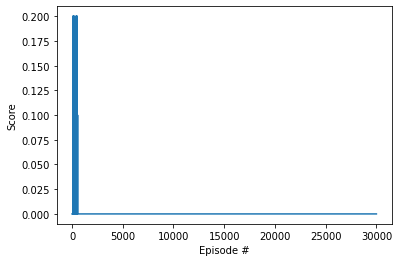


///// Beginning training set  E24.04  with:
      LR actor         =  0.0005
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  23100
5000	Average score:   0.000,        mem:   1673/    33 ( 2.0%), avg 1396.8 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2398/    33 ( 1.4%), avg 1404.3 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3178/    38 ( 1.2%), avg 1405.1 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3845/    38 ( 1.0%), avg 1408.8 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4503/    38 ( 0.8%), avg 1411.2 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5202/    38 ( 0.7%), avg 1415.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.3/50


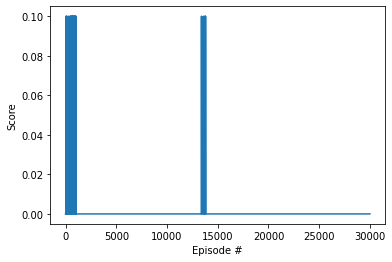


///// Beginning training set  E24.05  with:
      LR actor         =  0.0005
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  111
5000	Average score:   0.000,        mem:   1764/   118 ( 6.7%), avg 1360.1 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2462/   118 ( 4.8%), avg 1408.6 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3160/   118 ( 3.7%), avg 1429.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3853/   118 ( 3.1%), avg 1433.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4587/   118 ( 2.6%), avg 1433.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5273/   118 ( 2.2%), avg 1436.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.4/67


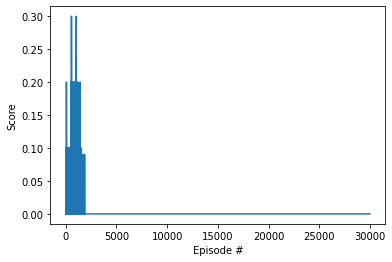


///// Beginning training set  E24.06  with:
      LR actor         =  0.0005
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  23100
5000	Average score:   0.000,        mem:   1744/    94 ( 5.4%), avg 1371.0 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2468/    94 ( 3.8%), avg 1390.5 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3171/    94 ( 3.0%), avg 1408.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3821/    94 ( 2.5%), avg 1415.9 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4498/    94 ( 2.1%), avg 1418.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5216/    94 ( 1.8%), avg 1417.8 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.4/68


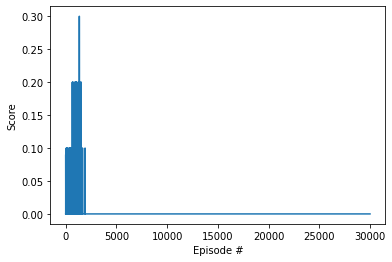


///// Beginning training set  E24.07  with:
      LR actor         =  0.0005
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  111
5000	Average score:   0.000,        mem:   1632/     0 ( 0.0%), avg 1363.2 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2325/     0 ( 0.0%), avg 1247.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3038/     0 ( 0.0%), avg 1167.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3766/     0 ( 0.0%), avg 1128.7 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4475/     0 ( 0.0%), avg 1114.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5181/     0 ( 0.0%), avg 1107.0 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.3/38


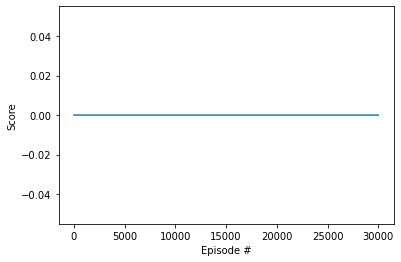


///// Beginning training set  E24.08  with:
      LR actor         =  0.0005
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  23100
5000	Average score:   0.000,        mem:   1660/    30 ( 1.8%), avg 1394.9 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2356/    30 ( 1.3%), avg 1397.5 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3058/    30 ( 1.0%), avg 1402.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3774/    30 ( 0.8%), avg 1405.6 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4436/    30 ( 0.7%), avg 1401.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5146/    30 ( 0.6%), avg 1401.1 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.3/50


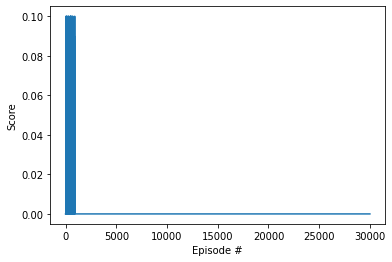


///// Beginning training set  E24.09  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  111
5000	Average score:   0.000,        mem:   1856/    79 ( 4.3%), avg 1189.1 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2624/    80 ( 3.0%), avg 1274.7 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3281/    80 ( 2.4%), avg 1329.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4006/    80 ( 2.0%), avg 1355.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4732/    80 ( 1.7%), avg 1370.6 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5446/    80 ( 1.5%), avg 1379.8 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.9/51


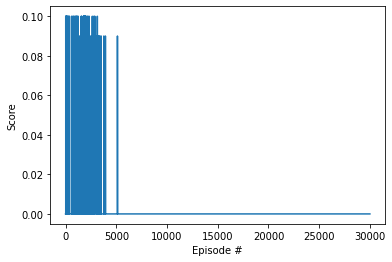


///// Beginning training set  E24.10  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  23100
5000	Average score:   0.000,        mem:   1912/   164 ( 8.6%), avg 1178.4 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2607/   164 ( 6.3%), avg 1277.1 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3335/   164 ( 4.9%), avg 1321.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4053/   164 ( 4.0%), avg 1347.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4752/   164 ( 3.5%), avg 1362.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5467/   164 ( 3.0%), avg 1373.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.8/67


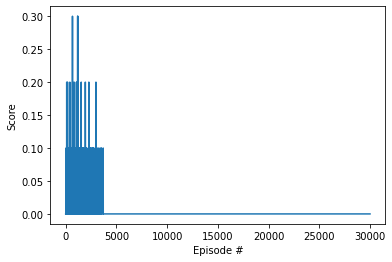


///// Beginning training set  E24.11  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  111
5000	Average score:   0.005,        mem:   1965/   149 ( 7.6%), avg 1122.2 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2699/   173 ( 6.4%), avg 1259.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3396/   173 ( 5.1%), avg 1305.7 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4091/   173 ( 4.2%), avg 1336.4 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4795/   173 ( 3.6%), avg 1354.0 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5523/   173 ( 3.1%), avg 1367.0 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.9/73


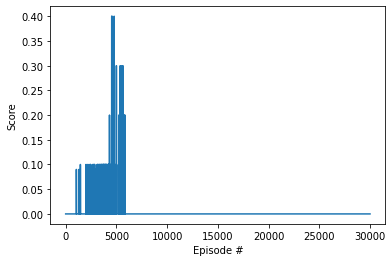


///// Beginning training set  E24.12  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  23100
5000	Average score:   0.004,        mem:   1842/    85 ( 4.6%), avg 1187.1 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2614/    93 ( 3.6%), avg 1292.8 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3309/    93 ( 2.8%), avg 1342.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4040/    93 ( 2.3%), avg 1359.9 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4785/    93 ( 1.9%), avg 1366.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5541/    93 ( 1.7%), avg 1370.5 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.8/53


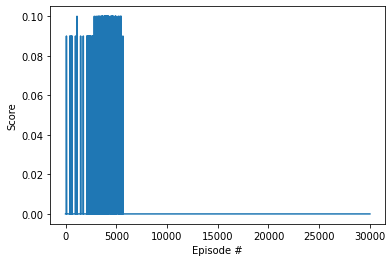


///// Beginning training set  E24.13  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  111
5000	Average score:   0.008,        mem:   2178/   319 (14.6%), avg 1057.1 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3264/   552 (16.9%), avg 1119.9 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   4014/   552 (13.8%), avg 1212.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4719/   552 (11.7%), avg 1262.9 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5422/   552 (10.2%), avg 1295.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6085/   552 ( 9.1%), avg 1321.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.7/85


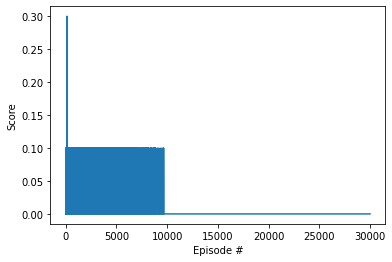


///// Beginning training set  E24.14  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  23100
5000	Average score:   0.002,        mem:   2014/   207 (10.3%), avg 1071.7 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2867/   227 ( 7.9%), avg 1169.9 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3539/   227 ( 6.4%), avg 1250.5 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4249/   227 ( 5.3%), avg 1293.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4966/   227 ( 4.6%), avg 1322.6 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5695/   227 ( 4.0%), avg 1340.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.3/72


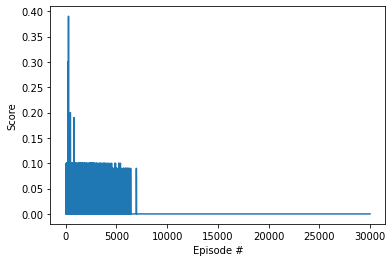


///// Beginning training set  E24.15  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  111
5000	Average score:   0.000,        mem:   1926/   193 (10.0%), avg 1208.1 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2658/   193 ( 7.3%), avg 1318.2 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3380/   193 ( 5.7%), avg 1345.2 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4057/   193 ( 4.8%), avg 1355.8 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4781/   193 ( 4.0%), avg 1354.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5483/   193 ( 3.5%), avg 1363.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.7/76


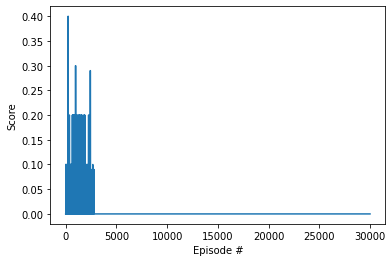


///// Beginning training set  E24.16  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Seed             =  23100
5000	Average score:   0.003,        mem:   1784/    90 ( 5.0%), avg 1198.9 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2583/   144 ( 5.6%), avg 1278.5 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3274/   144 ( 4.4%), avg 1325.7 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3973/   144 ( 3.6%), avg 1346.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4695/   144 ( 3.1%), avg 1362.0 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5348/   144 ( 2.7%), avg 1365.7 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.8/61


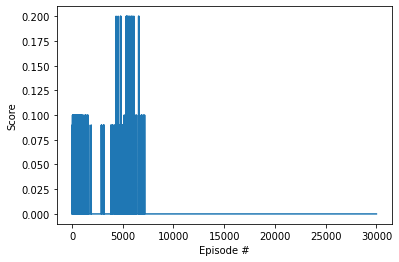



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them

TIME_STEPS         = 200
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX     = "E24"
    EPISODES       = 30001
    BATCH          = 1000
    BAD_STEP_PROB  = 0.01
    NOISE_DECAY    = 1.0 #need to test 0.99999; 0.9999 is too small
    NOISE_SCALE    = 0.001
    WEIGHT_DECAY   = 1.0e-5
    GAMMA          = 0.99
    
    # session loop variables:
    SEEDS          = (111, 44939) #(0, 111, 468, 5555, 23100, 44939)
    LR_ACTORS      = (0.0001, 0.00005)
    LR_CRITICS     = (0.0001, 0.00005)
    LEARN_EVERYS   = (100,)
    LEARN_ITERS    = (1, 2)
    TAUS           = (0.0005, 0.001, 0.002)
    
    
    num_sets = len(LR_ACTORS) * len(LR_CRITICS) * len(SEEDS) * len(LEARN_EVERYS) * len(LEARN_ITERS)
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, num_sets, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Batch size    = ", BATCH)
    print("    Bad step prob = ", BAD_STEP_PROB)
    print("    Noise decay   = ", NOISE_DECAY)
    print("    Noise scale   = ", NOISE_SCALE)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    print("    Tau           = ", TAU)
    
    set_id = 0
    for LR_ACTOR in LR_ACTORS:
        for LR_CRITIC in LR_CRITICS:
            for LEARN_EVERY in LEARN_EVERYS:
                for LEARN_ITER in LEARN_ITERS:
                    for TAU in TAUS:
                        for SEED in SEEDS:
                            do_it()
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [4]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform



### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [6]:
env.close()